In [48]:
import json
import matplotlib.pyplot as plt
import math

from os import listdir
from os.path import join
from random import choice
from PIL import Image, ImageDraw

In [2]:
DEMO_PATH = 'demo'
TRAIN_PATH = 'data/train'
VALIDATION_PATH = 'data/validation/'
TEST_PATH = 'data/test'

In [4]:
print('Train images count:', len(listdir(join(TRAIN_PATH, 'image'))))
print('Validation images count:', len(listdir(join(VALIDATION_PATH, 'image'))))
print('Test images count:', len(listdir(join(TEST_PATH, 'image'))))
print('Total images count:', len(listdir(join(TRAIN_PATH, 'image'))) + len(listdir(join(VALIDATION_PATH, 'image'))) + len(listdir(join(TEST_PATH, 'image'))))

Train images count: 191961
Validation images count: 32153
Test images count: 62629
Total images count: 286743


Let's see how looks annotation file of image

In [8]:
json.load(open(join(VALIDATION_PATH, 'annos', '000067.json')))["item2"]

{'segmentation': [[151.59033270558842,
   432.65850596359326,
   194.4162162162162,
   432.32027027027027,
   235.34594594594594,
   429.76216216216216,
   286.5081081081081,
   422.94054054054055,
   295.03513513513514,
   460.4117604090577,
   297.0804236669101,
   492.25982468955436,
   299.417896274653,
   521.7704163623081,
   298.4936449963477,
   530.5361577794012,
   295.863988312637,
   533.4579985390798,
   291.1890430971512,
   556.5405405405406,
   286.80628195763336,
   579.6230825420015,
   284.80270270270273,
   588.5974799123449,
   284.5105186267349,
   602.0379474068664,
   284.218334550767,
   606.7128926223521,
   285.97143900657414,
   614.3096785975165,
   286.6035062089116,
   630.0,
   238.68531775018272,
   630.0,
   237.2243973703434,
   626.9809715120526,
   236.055661066472,
   623.4747626004383,
   235.49503287070857,
   602.8369612856098,
   234.88692476260056,
   575.2643900657416,
   235.60241051862678,
   559.337253469686,
   234.01037253469698,
   535.

We have some items with bb and labels. Other annotation information may discard.

In [28]:
math.sqrt(number_imgs)

2.449489742783178

In [27]:
6 / round()

2.4494897427831783

Ok, now see random image

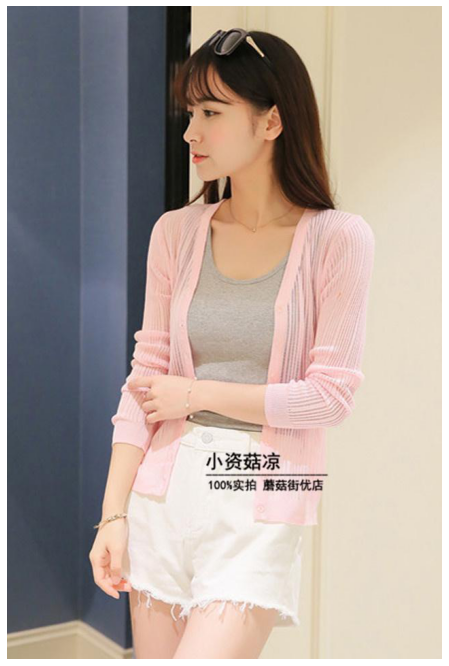

In [47]:
plt.figure(figsize=(16, 12))
img = plt.imread(join(TRAIN_PATH, 'image', choice(listdir(join(TRAIN_PATH, 'image')))))

plt.imshow(img)
plt.axis('off');

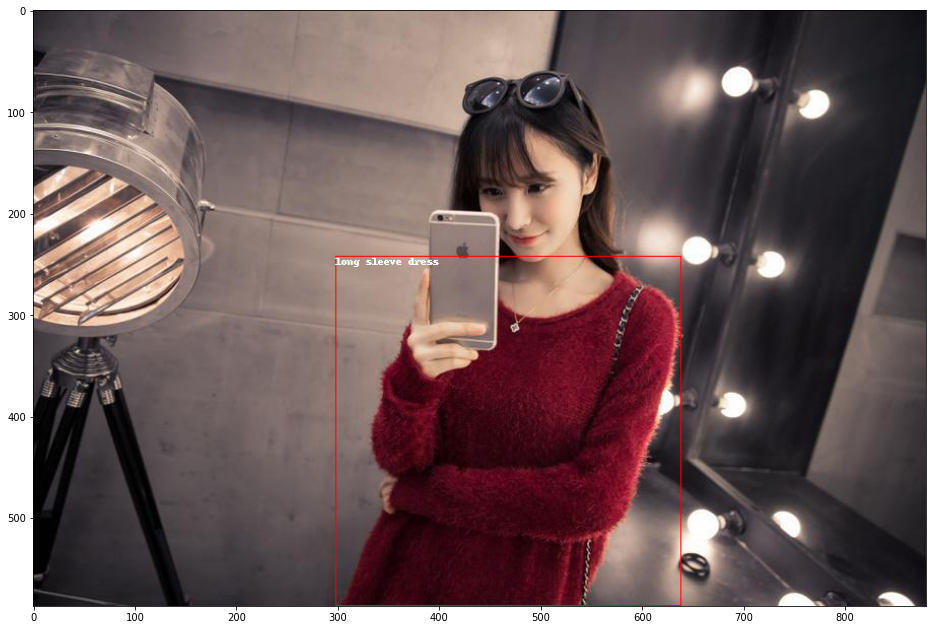

In [61]:
img_name = choice(listdir(join(TRAIN_PATH, 'image')))
img = Image.fromarray(plt.imread(join(TRAIN_PATH, 'image', img_name)))
annt = json.load(open(join(TRAIN_PATH, 'annos', img_name.split('.')[0] + '.json')))

bboxes = []
labels = []
for key in list(annt.keys()):
    if 'item' in key:
        box = annt[key]['bounding_box']
        bboxes.append(box)
        labels.append(annt[key]['category_name'])

draw = ImageDraw.Draw(img)

for bbox, label in zip(bboxes, labels):
    draw.rectangle(bbox, outline='red')
    draw.text([bbox[0], bbox[1]], label)
plt.figure(figsize=(16, 12))
plt.imshow(img);